# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN-12"
COLLABORATORS = "Zuzanna Słobodzian, Anna Staniszewska, Rafał Żeglen"

---

## Zestaw zadań 7: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [3]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    expected_value = intensity*(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])
    n = np.random.poisson(expected_value)
   
    x = np.random.uniform(x_lim[0],x_lim[1],n)
    y = np.random.uniform(y_lim[0],y_lim[1],n)
    
    array = pd.DataFrame(data={"X":x.flatten(), "Y":y.flatten()})
    
    return array

### Zadanie 1: Import i przygotowanie danych (9 pkt)

Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z trzech dołączonych do niego plików. Następnie, wykorzystując funkcję `geopandas.GeoDataFrame()` przygotuj na ich podstawie trzy tablice z danymi:

1) Tablica zawierająca wybrane dane dotyczące województw:
    - "Nazwa" - nazwy województw
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierającąa wybrane dane dotyczące <u>miast</u>:
    - "Nazwa" - nazwy miast
    - "geometry" - geometria obiektów
<br/>
<br/>
2) Tablica zawierająca wybrane dane dotyczące <u>Wisły</u> i <u>Odry</u>:
    - "Nazwa" - nazwy rzek
    - "geometry" - geometria obiektów


Wyświetl przygotowane tablice.

Uwaga 1: Pliki zawierają więcej danych niż opisane wyżej tablice. W wynikowych tablicach nie powinny znaleźć się zbędne dane.
    
Uwaga 2: Poprawny import polskich nazw może wymagać ustawienia odpowiedniej wartości argumentu `encoding` podczas wywoływania funkcji `geopandas.read_file()`.

In [4]:
woj = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz7/Wojewodztwa.zip")
wojewodztwa = gpd.GeoDataFrame({"Nazwa":woj["JPT_NAZWA_"],"geometry":woj["geometry"]})

In [5]:
mias = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz7/Miejscowosci.zip")
mias = mias[mias["rodzaj"] == "miasto"]
miasta = gpd.GeoDataFrame({"Nazwa":mias["nazwaGlown"],"geometry":mias["geometry"]})

In [6]:
rz = gpd.read_file("C:/Users/zuzka/Documents/studia/semestr_3/analiza_danych_przestrzennych/zz7/Rzeki.zip")
rz = rz[(rz["NAZ_RZEKI"] == "Wisła") | (rz["NAZ_RZEKI"] == "Odra")]
rzeki = gpd.GeoDataFrame({"Nazwa":rz["NAZ_RZEKI"],"geometry":rz["geometry"]})

### Zadanie 2: Transformacja między odwzorowaniami kartograficznymi (3 pkt)

Wczytywane dane są zapisane z wykorzystaniem różnych odwzorowań kartograficznych. Przed rozpoczęciem analizy należy je ze sobą uzgodnić.

Korzystając z własności obiektów GeoDataFrame `geopandas.GeoDataFrame.crs` sprawdzć odwzorowanie kartograficzne, w którym zapisane są poszczególne tablice. Jeżeli odwzorowanie jest inne niż epsg:2180 dokonaj jego konwersji z wykorzystaniem funkcji `geopandas.GeoDataFrame.to_crs()`.

In [7]:
print(miasta.crs)
wojewodztwa = wojewodztwa.to_crs("epsg:2180")
rzeki = rzeki.to_crs("epsg:2180")


epsg:2180


### Zadanie 3: Wizualizacja danych wejściowych (3 pkt)

Korzystając z funkcji pakietu matplotlib oraz funkcji `geopandas.GeoDataFrame.plot()` zwizualizuj komplet przygotowanych danych. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

<AxesSubplot: >

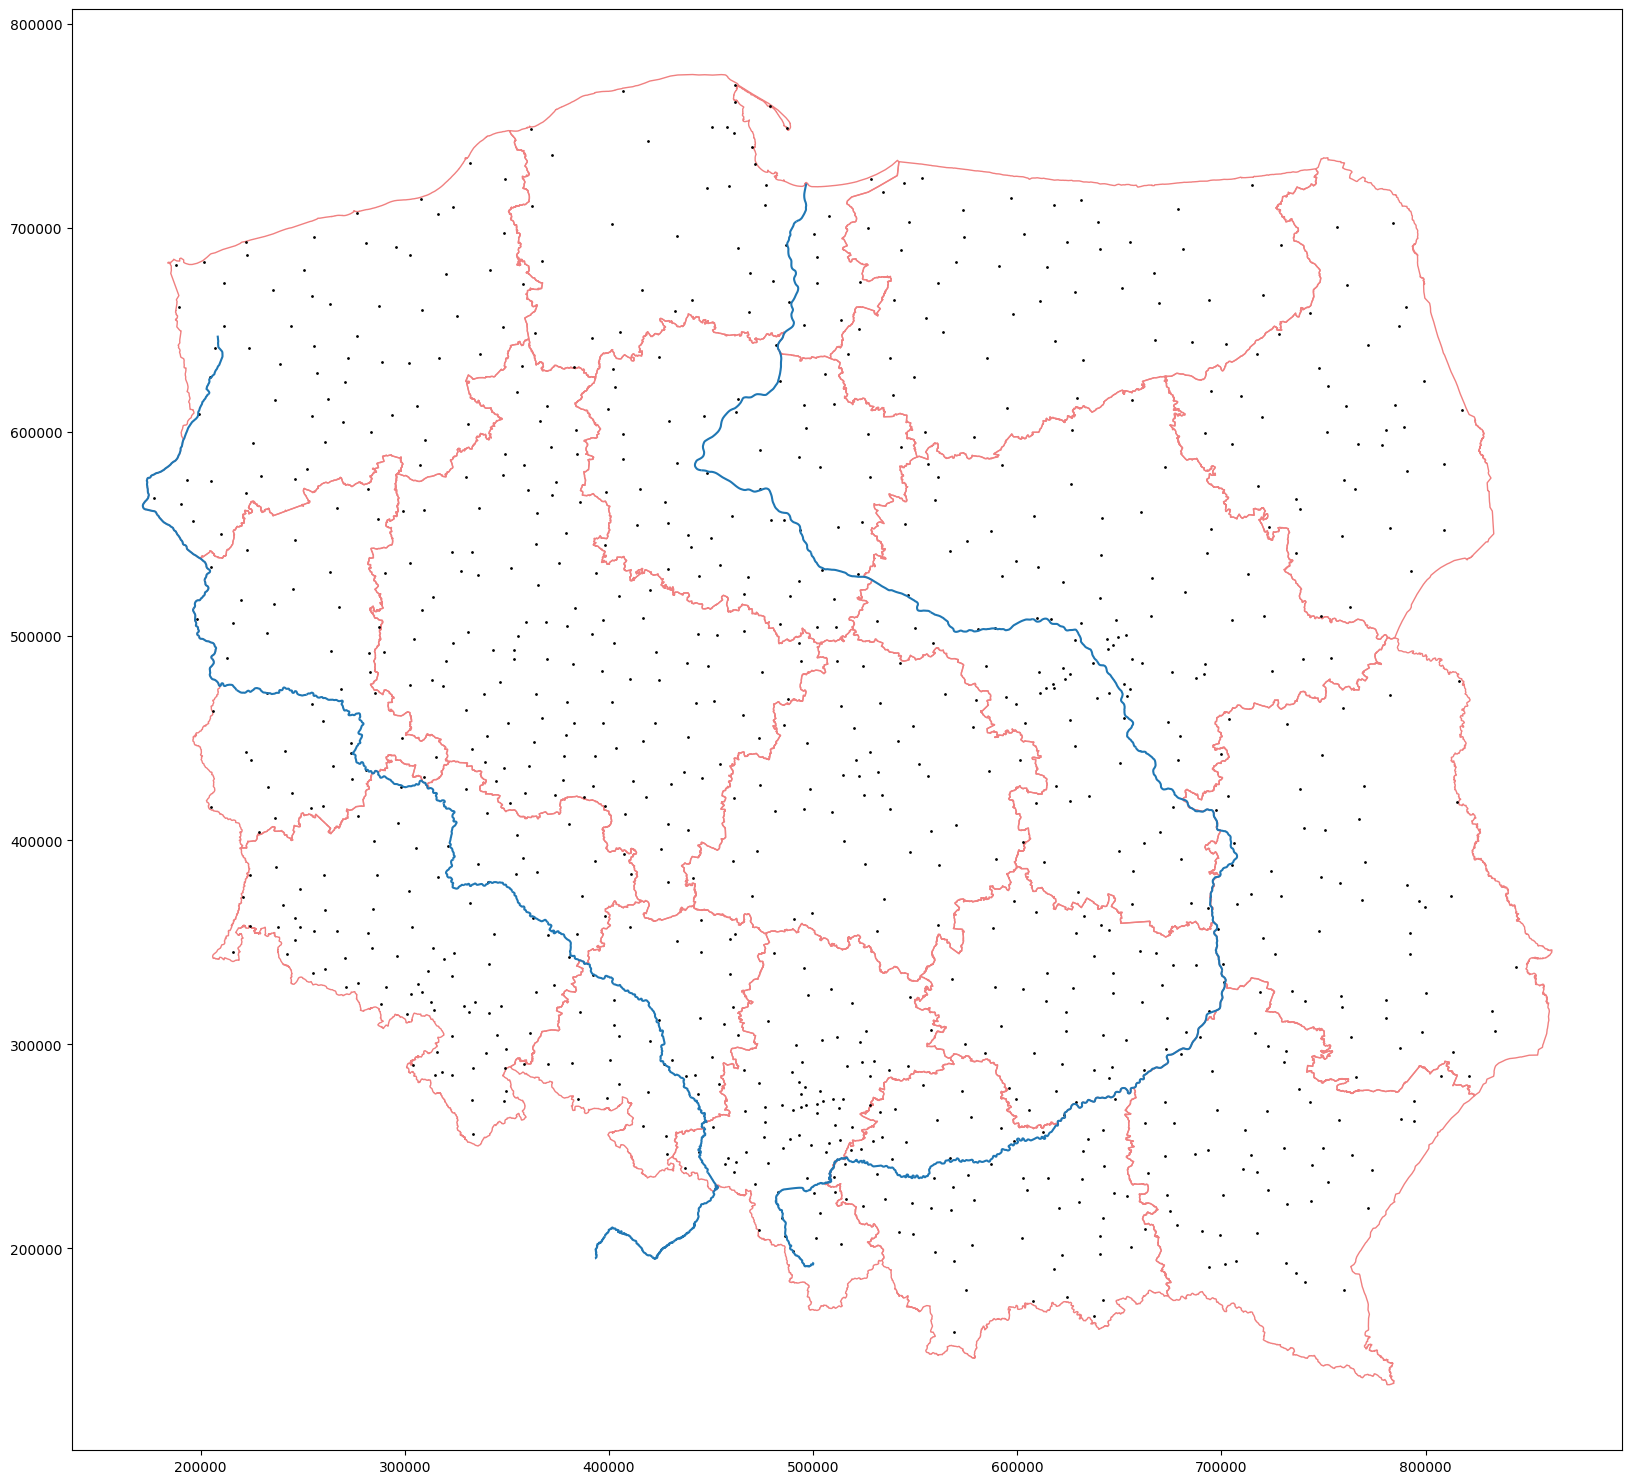

In [8]:
fig,ax = plt.subplots(1,figsize=(20,20))
wojewodztwa.plot(ax=ax,color="None",edgecolor="lightcoral")
miasta.plot(ax=ax,color="black",markersize=1)
rzeki.plot(ax=ax)


### Zadanie 4: Mierzenie długości, pola powierzchni i odległości (10 pkt)

#### a) Długość Wisły
Korzystając z własności `geopandas.GeoSeries.length` zmierz długość Wisły. Wyświetl odpowiedź podając długość rzeki w kilometrach.

In [10]:
wisla_l = rzeki.length[rzeki["Nazwa"]=="Wisła"]
print("Długość Wisły:",round(float(wisla_l/1000),2),"km")

Długość Wisły: 1019.76 km


#### b) Pola powierzchni województw
Korzystając z własności `geopandas.GeoSeries.area` zmierz powierzchnię województw. Zapisz wyniki do tablicy w kolumnie o nazwie "Pole". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie jakie jest pole powierzchni Polski (podaj pole w kilometrach kwadratowych) oraz przygotowania wizualiacji, na której kolor przypisany województwom jest powiązany z ich powierzchnią. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [59]:
wojewodztwa["Pole"]=wojewodztwa.area
pole_pl = sum(wojewodztwa["Pole"])
print("Pole powierzchni Polski:",round((pole_pl/1000000),2),"km2")

Pole powierzchni Polski: 312506.64 km2


<AxesSubplot: >

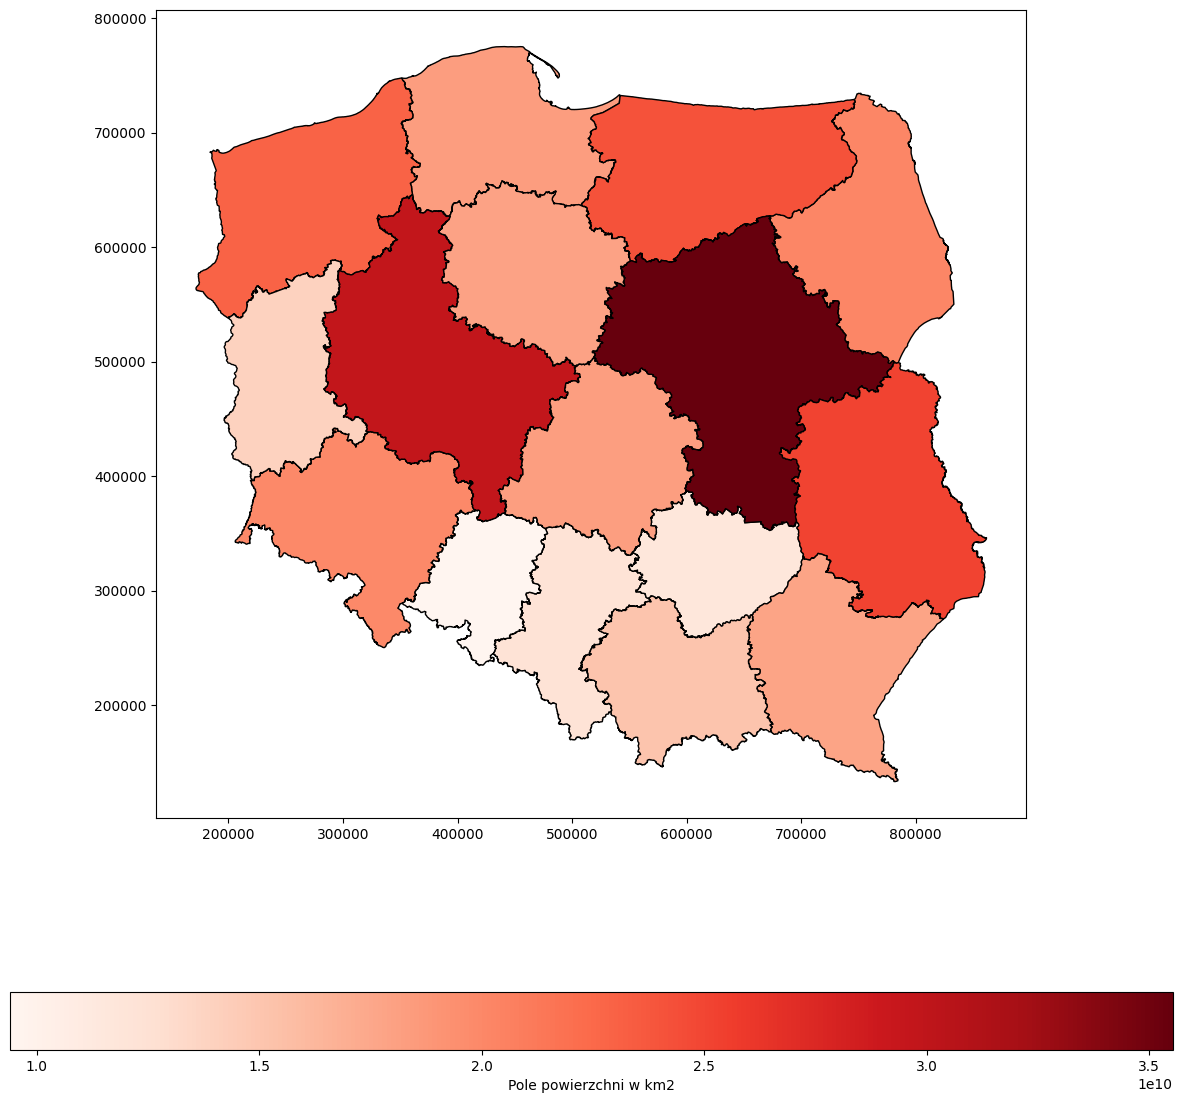

In [60]:
fig,ax = plt.subplots(1,figsize=(15,15))
wojewodztwa.plot(ax=ax,column="Pole",cmap="Reds",edgecolor="black",legend=True,
                 legend_kwds={'label':"Pole powierzchni w km2",'orientation':"horizontal"})


#### c) Odległość miast od Krakowa
Korzystając z funkcji `geopandas.GeoSeries.distance()` zmierz odległość poszczególnych miast od Krakowa. Zapisz wyniki do tablicy w kolumnie o nazwie "Odległość od Krakowa". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie w jakiej odległości od Krakowa leży Poznań (odpowiedź podaj w kilometrach) oraz przygotowania wizualiacji, na której kolor przypisany miastom jest powiązany z ich odległością od Krakowa. 

Wizualizacja powinna zawierać:
- kontury województw, bez wypełnienia,
- lokalicaje miast.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [61]:
krakow_point = miasta[miasta["Nazwa"] == "Kraków"].geometry
miasta["Odległość od Krakowa"] = pd.concat([miasta["geometry"].distance(point) for point in krakow_point])
poznan_dist = miasta[miasta["Nazwa"] == "Poznań"]["Odległość od Krakowa"]
print("Odległość Krakowa od Poznania:",round(float(poznan_dist/1000),2),"km")

Odległość Krakowa od Poznania: 334.6 km


### Zadanie 5: Wykorzystanie prostych operacji geometrycznych (12 pkt)

miasta["geometry"]#### a) Miasta blisko Wisły

Korzystając z funkcji `geopandas.GeoSeries.buffer()` oraz `geopandas.GeoSeries.within()` sprawdź, które miast leżą bliżej niż 20 km od Wisły. Zapisz wyniki do tablicy w kolumnie o nazwie "Blisko Wisły". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie ile miast leży bliżej niż 20 km od Wisły oraz przygotowania wizualiacji, na której oznaczony zostanie obszar znajdujący się bliżej niż 20 km od Wisły, a znajdujące się w tym obszarze miasta będą wyróżnione kolorem względem pozostałych miast.

Wizualizacja powinna zawierać:
- województwa, wypełnione jednolitym kolorem,
- miasta, w jednym z dwóch wybranych kolorów w zależności od położenia w obrębie lub poza analizowanym obszarem.
- rzeki wypełnione jednolitym kolorem,
- oznaczenie obszaru leżącego nie dalej niż 20 km od Wisły.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [62]:
bufor = rzeki[rzeki["Nazwa"]=="Wisła"].buffer(20000.0)
miasta["Blisko Wisły"] = pd.concat([miasta["geometry"].within(point) for point in bufor], axis=1)
miasta

,Nazwa,geometry,Odległość od Krakowa,Blisko Wisły
325,Aleksandrów Kujawski,POINT (479373.050 556833.540),324646.944330,True
326,Aleksandrów Łódzki,POINT (520933.510 439274.230),200401.493101,False
390,Alwernia,POINT (538609.780 243752.610),28466.435299,True
447,Andrychów,POINT (524250.260 220924.610),48765.206388,True
580,Annopol,POINT (700882.160 339274.920),164115.126047,True
...,...,...,...,...
101357,Żuromin,POINT (561072.600 578091.430),333889.099372,False
101387,Żychlin,POINT (542758.370 486616.290),243576.558019,False
101460,Żyrardów,POINT (599274.600 466617.820),224681.329023,False
101497,Żywiec,POINT (513848.050 201968.410),67978.106965,True


#### b) Województwa, przez które przepływa Odra
Korzystając z funkcji `geopandas.GeoSeries.intersects()` sprawdź, przez które województwa przepływa Odra. Zapisz wyniki do tablicy w kolumnie o nazwie "Odra w obrębie". 
Następnie wykorzystaj dane do odpowiedzenia na pytanie przez ile województw przepływa Odra oraz przygotowania wizualiacji, na której województwa przez które przepływa Odra będą wyróżnione kolorem względem pozostałych województw.

Wizualizacja powinna zawierać:
- województwa, wwypełnione jednym z dwóch wybranych kolorów w zależności od spełnienia warunku,
- miasta, wypełnione jednolitym kolorem,
- rzeki wypełnione jednolitym kolorem.

Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

In [63]:
wojewodztwa["Odra w obrębie"] = pd.concat([wojewodztwa["geometry"].intersects(point) for point in rzeki[rzeki["Nazwa"]=="Odra"]["geometry"]])
wojewodztwa

,Nazwa,geometry,Pole,Odra w obrębie
0,śląskie,"MULTIPOLYGON (((494179.526 358814.295, 494173....",1.231704e+10,True
1,opolskie,"POLYGON ((417001.841 369554.248, 417005.901 36...",9.399986e+09,True
2,świętokrzyskie,"POLYGON ((549668.108 320839.847, 549676.668 32...",1.169726e+10,False
3,pomorskie,"POLYGON ((414159.332 769636.478, 414269.395 76...",1.830697e+10,False
4,podlaskie,"POLYGON ((700075.252 572284.982, 700055.491 57...",2.019317e+10,False
5,zachodniopomorskie,"POLYGON ((225874.333 694332.554, 231446.660 69...",2.290337e+10,True
6,dolnośląskie,"POLYGON ((229358.510 402830.704, 229362.963 40...",1.993617e+10,True
7,wielkopolskie,"POLYGON ((347736.460 606210.458, 347736.779 60...",2.979729e+10,False
8,podkarpackie,"POLYGON ((713790.986 331036.437, 713798.945 33...",1.784371e+10,False
9,małopolskie,"POLYGON ((568911.289 294804.269, 568909.081 29...",1.516604e+10,False


### Zadanie 6: Generowanie procesu punktowego w obrębie poligonu (13 pkt)

Przygotuj funkcję `homogeneous_poisson_on_polygon()`, która będzie wykorzystywała funkcję `homogeneous_poisson_on_rectangle()` przygotową w ramach pierwszego zestawu zadań oraz możliwości pakietu geopandas do generowania jednorodnego rozkładu Poissona w obrębie dowolnego poligonu.

Następnie wykorzystaj funkcję do wygenerowania rozkładu punktów o intensywności $10^{-8} pkt/m^2$ na obszarze województwa mazowieckiego i zwizualizuj wyniki. Ustaw parametry wykresu oraz wizualizowanych obiektów (wielkość figury, kolory, grubość linii, wielkość punktów itp.) tak aby wygenerowana mapa była przejrzysta i czytelna.

Przydatne funkcje i własności:
- `geopandas.GeoSeries.bounds`
- `geopandas.GeoSeries.from_xy()`
- `geopandas.GeoSeries.set_crs()`
- `geopandas.GeoSeries.within()`

#### a) Przygotowanie funkcji

In [12]:
def homogeneous_poisson_on_polygon(intensity, polygon):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty.
    
    Returns
    -------
    points: GeoDataFrame
        Tablica zawierająca kolumnę "geometry" ze współrzędnymi punktów w odwzorowaniu kartograficznym identycznym 
        jak odwzorowanie zmiennej polygon.
    """
    
    min_x, min_y, max_x, max_y= polygon.bounds
    
    geometry = homogeneous_poisson_on_rectangle(intensity, [min_x, max_x], 
                                                [min_y, max_y])
    
    array = gpd.points_from_xy(geometry["X"], geometry["Y"])
    array = array[array.within(polygon)]
    return gpd.GeoSeries(array)

#### b) Wygenerowanie procesu

In [13]:
woj_maz = homogeneous_poisson_on_polygon((10**(-8)), wojewodztwa[wojewodztwa["Nazwa"] == "mazowieckie"].geometry[12])
woj_maz


0      POINT (596893.344 465067.397)
1      POINT (685568.704 413565.417)
2      POINT (625238.888 603468.557)
3      POINT (729210.312 498933.626)
4      POINT (623001.159 381488.743)
                   ...              
358    POINT (663237.402 620465.997)
359    POINT (695362.982 520647.421)
360    POINT (623931.462 383788.355)
361    POINT (671848.305 356967.308)
362    POINT (648478.812 533320.275)
Length: 363, dtype: geometry

#### c) Wizualizacja

<AxesSubplot: >

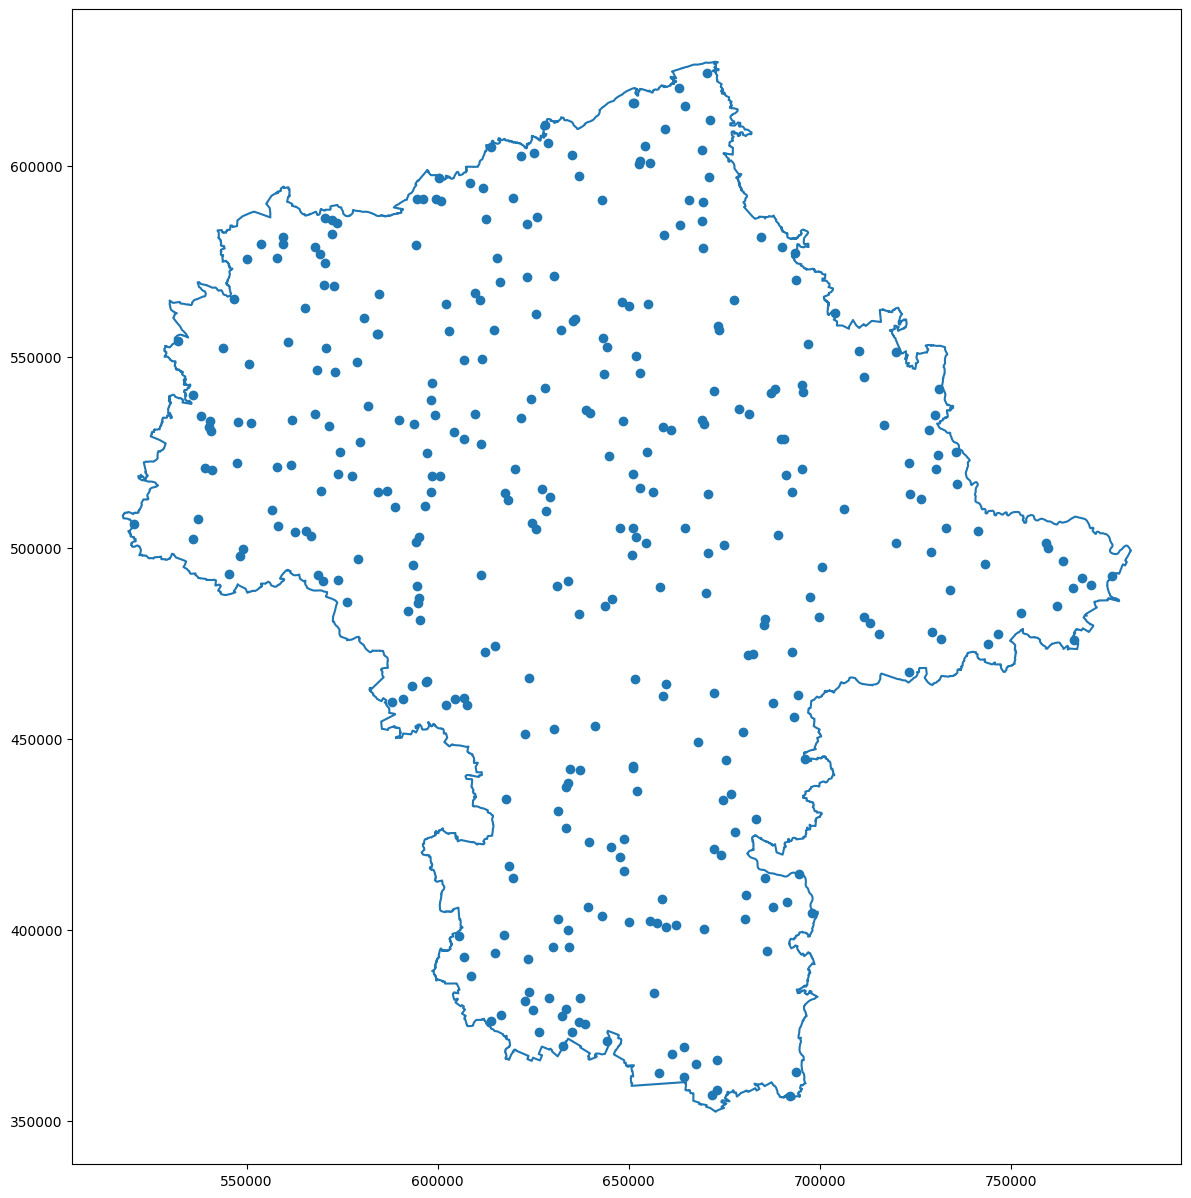

In [18]:
fig,ax = plt.subplots(1,figsize=(15,15))
woj_maz.plot(ax=ax)
wojewodztwa[wojewodztwa["Nazwa"] == "mazowieckie"].boundary.plot(ax=ax)